In [7]:

# Project : Data science
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [8]:
heart= pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 2


In [ ]:
heart.info()

In [ ]:
print('unique entries in each column')
heart.nunique()

In [ ]:
# distribution of the range of ages for heart attack plot
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

In [ ]:
heart.head(20)

In [ ]:
heart1=heart

In [ ]:

bg_color = (0.15, 0.05, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})  

In [ ]:
heart['Age'].hist(grid=False)

In [ ]:
heart['Oldpeak'].hist(grid=False)

In [ ]:
heart['Target'].hist(grid=False)

In [ ]:
# subselect features of interest and then perform classification 
# divide dataset into training, test and validation 
sns.swarmplot(heart['Age'])

In [ ]:
result=[]
for i in heart['ChestPain']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal')
    if i==3:
        result.append('Asymptomatic')
        
heart['ChestPainType']=pd.Series(result)

sns.swarmplot(x='ChestPainType', y='Age', data=heart)

In [ ]:
#check the relation of major vessels and chest pain type
ax=sns.countplot(hue=result,x='MajorVessels',data=heart,palette='husl')

In [ ]:
# plot the pie chart indicating distribution of each chest pain type
ChestPain=(heart['ChestPainType']).value_counts()
percent_typAng= ChestPain[0] *100/ len(heart)
percent_AtypAng=ChestPain[1]*100/len(heart)
percent_nonAng=ChestPain[2]*100/len(heart)
percent_none=ChestPain[3]*100/len(heart)

values= [percent_typAng, percent_AtypAng, percent_nonAng, percent_none]
labels=['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Chest Pain Type Percentage")    
plt.show()

In [ ]:
# do a gender comparison 
ax = sns.countplot(hue=result,x='Gender',data=heart,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

In [ ]:
#check if bp and cholestrol are correlated
ax = sns.regplot(x='RestingBloodPressure', y='Cholestrol',data=heart, color="g")

In [ ]:
heart1.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=heart1.drop(['Target','ChestPainType'],axis=1).values
y=heart1['Target'].values

In [ ]:
columns=heart1.drop(['Target','ChestPainType'],axis=1).columns

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=1)

In [3]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

NameError: name 'x_train' is not defined

In [23]:
svm=SVC(gamma='auto')
svm.fit(x_train,y_train)

SVC(gamma='auto')

In [24]:
y_pred=svm.predict(x_test)

In [27]:
print(accuracy_score(y_test,y_pred))

0.9853658536585366


<AxesSubplot:>

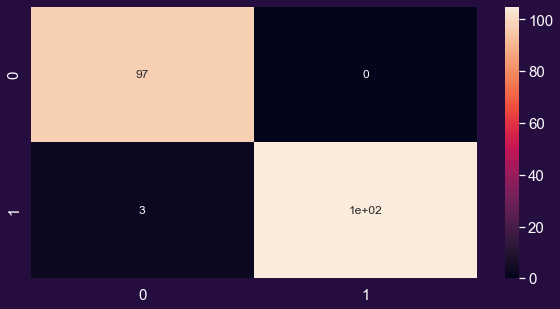

In [35]:
cm=confusion_matrix(svm.predict(x_test),y_test)
sns.heatmap(cm,annot=True)

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred=knn.predict(x_test)
print()

In [31]:
print(accuracy_score(y_test,y_pred))

0.9170731707317074


In [32]:
print(knn.predict(x_test[2].reshape(1,-1)))

[1]


<AxesSubplot:>

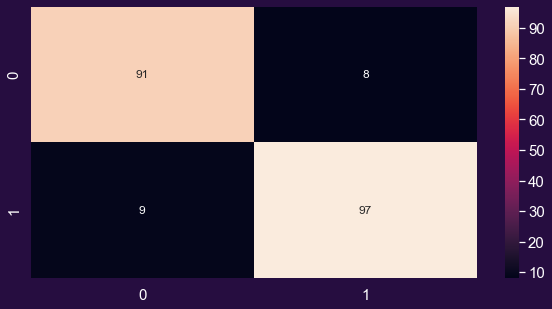

In [37]:
cm=confusion_matrix(knn.predict(x_test),y_test)
sns.heatmap(cm,annot=True)

In [38]:
model=RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [39]:
model.score(x_test,y_test)

1.0

In [40]:
cm=confusion_matrix(model.predict(x_test),y_test)

<AxesSubplot:>

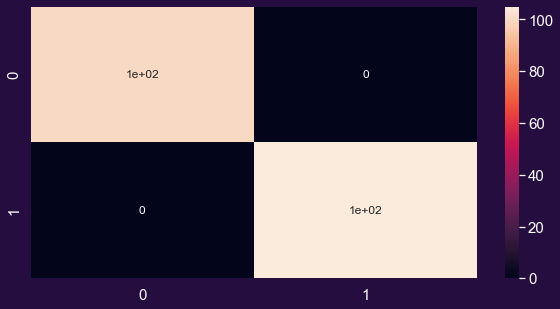

In [41]:
sns.heatmap(cm,annot=True)

In [42]:
 cm

array([[100,   0],
       [  0, 105]], dtype=int64)